# PCA on "deep features"

In [2]:
import numpy as np 
deepfeats = np.load('deepfeats.npy')
print(deepfeats.shape)

(384, 513, 256)


(375, 500, 3)


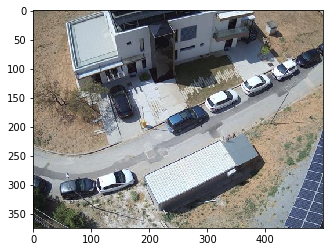

In [11]:
import matplotlib.pyplot as plt 
from PIL import Image
A = Image.open('DJI_0252_low.jpg')
Anp = np.array(A)
print(Anp.shape)
plt.imshow(A)
plt.show()

In [12]:
# Δεν μπορούμε να οπτικοποιήσουμε έναν τανυστή με C > 3 κανάλια τόσο απλά!
plt.imshow(deepfeats)
plt.show()

TypeError: Invalid shape (384, 513, 256) for image data

In [19]:
from sklearn.decomposition import PCA
# Για να χρησιμοποιήσουμε PCA, θέλουμε να κάνουμε reshape τα δεδομένα μας (ένα διάνυσμα μεγέθους C=256 ανά pixel δηλαδή)
# Οπότε αν έχουμε έναν τανυστή H x W x C, θα κάνουμε reshape σε πίνακα HW x C (=αριθμός δεδομένων-pixels επί διάσταση δεδομένων)
N = deepfeats.shape[0]*deepfeats.shape[1]
C = deepfeats.shape[-1]
X = np.reshape(deepfeats, [N, C])
print('Τα αρχικά δεδομένα μου έχουν μέγεθος: {}'.format(X.shape))
Xreduced = PCA(n_components=3).fit_transform(X)
print('Μετά το PCA έχουμε μέγεθος: {}'.format(Xreduced.shape))

Τα αρχικά δεδομένα μου έχουν μέγεθος: (196992, 256)
Μετά το PCA έχουμε μέγεθος: (196992, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(384, 513, 3)


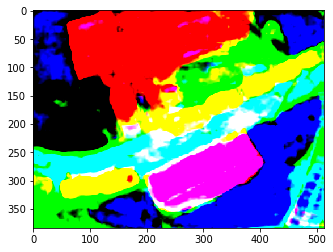

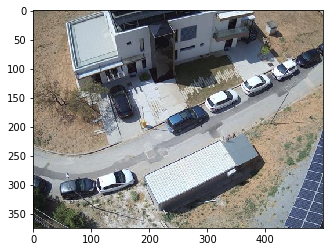

In [24]:
deepfeats_reduced = np.reshape(Xreduced, [deepfeats.shape[0], deepfeats.shape[1], 3])
print(deepfeats_reduced.shape)
plt.imshow(deepfeats_reduced)
plt.show()    
plt.imshow(Anp)
plt.show()